In [ ]:
import matplotlib.pyplot as plt

import numpy as np

from keras.layers import Input, Conv2D, MaxPooling2D#, UpSampling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
#from keras import optimizers
#from keras import regularizers

In [ ]:
#========================================================
#   Simple image plotting routine
#========================================================
def tvscale(img, plot_size=(6,6)):
    plt.rcParams['figure.figsize'] = plot_size
    imgplot = plt.imshow(img,interpolation="none",cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
#===============================================
#   Definicion de la red neuronal
#===============================================

#--- Definimos una entrada del mismo tama#o que las imagenes de MNIST
input_img = Input(shape=(128,128,3))

#--- Codificador. Filtra la imagen de entrada reduciendo la resolucion en cada capa (MaxPooling2D)
x = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', name='conv1')(input_img) # 16[n_kernels] * (3*3)[kernel] * 3[rgb] + 16 [nkernels, bias]
x = MaxPooling2D((2, 2), padding='same', name='maxpool1')(x) # 64,64,16

x = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', name='conv2')(x)  # 
x = MaxPooling2D((2, 2), padding='same', name='maxpool2')(x)  #  32,32,32

x = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', name='conv3')(x) # 
x = MaxPooling2D((2, 2), padding='same', name='maxpool3')(x) # 16,16,64

x = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', name='conv4')(x) # 
x = MaxPooling2D((2, 2), padding='same', name='maxpool4')(x) # 8,8,128

x = Flatten(name='flatten')(x)
x = Dense(32, activation='relu', name='dense1')(x)
x = Dropout(0.3, name='dropout')(x)
out = Dense(1, activation='sigmoid', name='out')(x)

model = Model(inputs=input_img, outputs=out)
#model.compile(loss='mse', optimizer='adam', metrics='mse')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 128, 128, 16)      448       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 64, 64, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 64, 64, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 16, 16, 64)        0     

In [ ]:
X1 = np.load('/content/drive/MyDrive/Cursos/cosmo-late.npy')
X2 = np.load('/content/drive/MyDrive/Cursos/cosmo-early.npy')

X1.shape

(301, 128, 128, 3)

In [ ]:
print("type", type(X1[0,0,0,0]))

type <class 'numpy.uint8'>


In [ ]:
#--- Concatenate early and late sets. Simple pre-processing
X = np.concatenate((X1,X2), axis=0)

#--- IMPORTANT!!! Normalize and convert to floating point!!!
X = X.astype(np.float32)/256.0 

#--- Assign classes
Y = np.zeros((X.shape[0]))
Y[0:len(X1)] = 1 #--- Late is 0, early 1
print(Y.shape)


#--- Get random indexes
rand_ind = ( np.arange(0,X.shape[0]) ) 
np.random.shuffle(rand_ind)

#--- Shuffle data
X = X[rand_ind]
Y = Y[rand_ind]


(602,)


In [ ]:
#--- Just checking that arrays are shuffled
Y[0:20]

array([1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0.])

In [ ]:
#--- Define training and test datasets

X_train = X[50:]
Y_train = Y[50:]

X_test = X[0:50]
Y_test = Y[0:50]


In [ ]:
#--- Train
history = model.fit( X_train, Y_train, batch_size=32, epochs=20, shuffle=True)

Epoch 1/20
18/18 [==============================] - 44s 25ms/step - loss: 0.6733 - accuracy: 0.5606
Epoch 2/20
18/18 [==============================] - 0s 16ms/step - loss: 0.3825 - accuracy: 0.8293
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 0.2246 - accuracy: 0.9261
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 0.2036 - accuracy: 0.9254
Epoch 5/20
18/18 [==============================] - 0s 15ms/step - loss: 0.1612 - accuracy: 0.9423
Epoch 6/20
18/18 [==============================] - 0s 15ms/step - loss: 0.1686 - accuracy: 0.9382
Epoch 7/20
18/18 [==============================] - 0s 15ms/step - loss: 0.1386 - accuracy: 0.9442
Epoch 8/20
18/18 [==============================] - 0s 15ms/step - loss: 0.1129 - accuracy: 0.9546
Epoch 9/20
18/18 [==============================] - 0s 15ms/step - loss: 0.1137 - accuracy: 0.9638
Epoch 10/20
18/18 [==============================] - 0s 15ms/step - loss: 0.0732 - accuracy: 0.9771
Epoch 11

In [ ]:
#--- Lets check the test dataset

#--- Predict class. IMPORTANT: round prediction
Y_pred = np.round(model.predict(X_test[0:50]))[:,0]

#--- Get errors
equal = np.where((Y_pred[0:50]-Y_test[0:50]) == 0)[0]

print(len(equal)/50.0 )

#--- Display some predictions and their actual value
for i in range(20):
  print(Y_test[i].astype(np.uint8), Y_pred[i].astype(np.uint8))

0.94
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
0 0


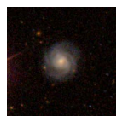

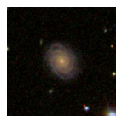

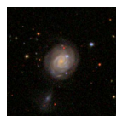

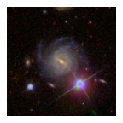

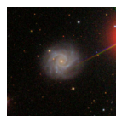

In [ ]:

#--- Now lets get some predictions again to display their corresponding images
early = np.where(Y_pred == 0)[0]
late  = np.where(Y_pred == 1)[0]

for i in range(5):
  tvscale(X_test[late[i]], plot_size=[2,2])